# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

![image-3.png](attachment:image-3.png)

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [1]:
# Write your solution here

import pandas as pd
ndf = pd.read_csv("loan_train.csv")
ndf


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
ndf.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [2]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np


data = pd.read_csv('loan_train.csv')
cat_cols = data.select_dtypes(include='number')
imputer= SimpleImputer(missing_values=np.nan)
data = imputer.fit_transform(cat_cols)
ndf = pd.DataFrame(data,columns = cat_cols.columns)
ndf.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

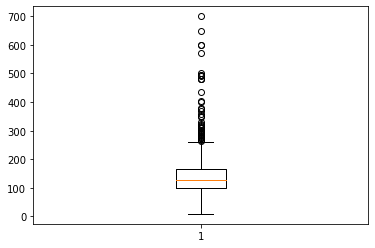

In [3]:
#Write your solution here

import matplotlib.pyplot as plt

plt.boxplot(ndf['LoanAmount'])
plt.show()


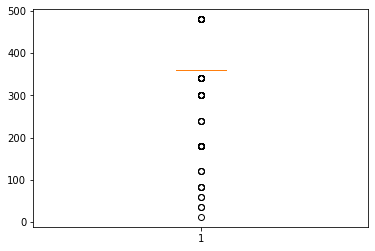

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot(ndf['Loan_Amount_Term'])
plt.show()


In [6]:
# Write your solution here
Q1 = ndf.ApplicantIncome.quantile(0.25)
Q3 = ndf.ApplicantIncome.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3+(IQR*1.5)
lowerlimit = Q1-(IQR*1.5)

df1 = ndf[(ndf.ApplicantIncome>lowerlimit) & (ndf.ApplicantIncome<upperlimit)]
df1.shape

(564, 5)

In [8]:
std = ndf.ApplicantIncome.std()
mean = ndf.ApplicantIncome.std()
upperlimit = mean + (3*std)
lowerlimit = mean - (3*std)
df2 = ndf[(ndf.ApplicantIncome>lowerlimit)&(ndf.ApplicantIncome<upperlimit)]
df2.shape


(607, 5)

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

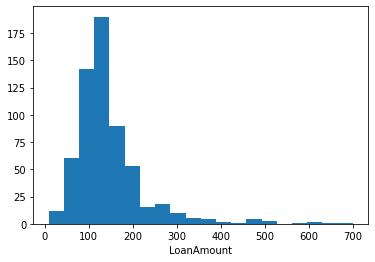

In [9]:
plt.hist(ndf.LoanAmount, bins = 20)
plt.xlabel("LoanAmount")
plt.show()

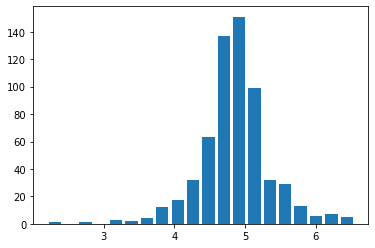

In [11]:
x = np.log(ndf['LoanAmount'])
plt.hist(x,bins=20, rwidth=0.8)
plt.show()


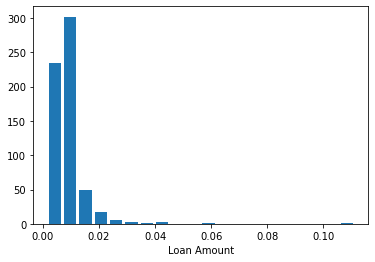

In [12]:
x = np.reciprocal(ndf['LoanAmount'])
plt.hist(x, bins = 20, rwidth = 0.8)
plt.xlabel("Loan Amount")
plt.show()

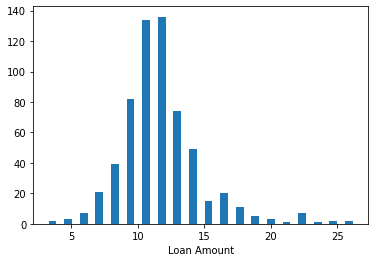

In [13]:
x = np.sqrt(ndf.LoanAmount)
plt.hist(x, bins=20, rwidth=0.5)
plt.xlabel("Loan Amount")
plt.show()

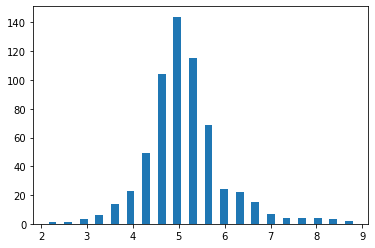

In [14]:
x = np.cbrt(ndf.LoanAmount)
plt.hist(x, bins=20,rwidth=0.5)
plt.show()

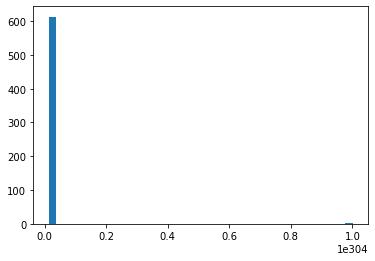

In [ ]:
x = np.exp(ndf.LoanAmount)
plt.hist(x, bins=20,rwidth=0.5)
plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [15]:
# Write your solution here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
numeric = scaler.fit_transform(ndf)
ndf1 = pd.DataFrame(numeric,columns = ndf.columns)
ndf1.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.070489,0.000000,0.198860,0.74359,1.0
1,0.054830,0.036192,0.172214,0.74359,1.0
2,0.035250,0.000000,0.082489,0.74359,1.0
3,0.030093,0.056592,0.160637,0.74359,1.0
4,0.072356,0.000000,0.191027,0.74359,1.0


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(ndf)
ndf1 = pd.DataFrame(numeric,columns = ndf.columns)
ndf1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,0.000000,0.279851,0.45164
1,-0.134412,-0.038732,-0.219273,0.279851,0.45164
2,-0.393747,-0.554487,-0.957641,0.279851,0.45164
3,-0.462062,0.251980,-0.314547,0.279851,0.45164
4,0.097728,-0.554487,-0.064454,0.279851,0.45164


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric = scaler.fit_transform(ndf)

robustdf = pd.DataFrame(numeric, columns=ndf.columns)
robustdf.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.698029,-0.517358,0.269956,0.0,0.0
1,0.264096,0.139079,-0.015504,0.0,0.0
2,-0.278492,-0.517358,-0.976744,0.0,0.0
3,-0.421422,0.509087,-0.139535,0.0,0.0
4,0.749786,-0.517358,0.186047,0.0,0.0


## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [27]:
# Write your solution here
df1 = pd.read_csv('loan_train.csv')
categorical_cols = df1.select_dtypes(include = ['object','bool'])
impute = SimpleImputer(strategy='most_frequent')
data = impute.fit_transform(categorical_cols)
cdf1 = pd.DataFrame(data, columns=categorical_cols.columns)
cdf1



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [28]:
cdf1.drop(columns = 'Loan_ID', inplace =True)
cdf1.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
categorical = ohe.fit_transform(cdf1[['Gender','Married', 'Self_Employed']]).toarray()

# cdf3 = pd.DataFrame(categorical)
# cdf3

In [43]:
categorical_columns = ['Gender','Married','Self_Employed']
cdf2= cdf1[categorical_columns]
cdf2 = pd.get_dummies(cdf2)
cdf2
 

,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes
0,0,1,1,0,1,0
1,0,1,0,1,1,0
2,0,1,0,1,0,1
3,0,1,0,1,1,0
4,0,1,1,0,1,0
...,...,...,...,...,...,...
609,1,0,1,0,1,0
610,0,1,0,1,1,0
611,0,1,0,1,1,0
612,0,1,0,1,1,0


In [44]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
cdf1[['Property_Area','Education']] = oe.fit_transform(cdf1[['Property_Area','Education']])
cdf3 = pd.DataFrame(cdf1)
cdf3

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,0.0,No,2.0,Y
1,Male,Yes,1,0.0,No,0.0,N
2,Male,Yes,0,0.0,Yes,2.0,Y
3,Male,Yes,0,1.0,No,2.0,Y
4,Male,No,0,0.0,No,2.0,Y
...,...,...,...,...,...,...,...
609,Female,No,0,0.0,No,0.0,Y
610,Male,Yes,3+,0.0,No,0.0,Y
611,Male,Yes,1,0.0,No,2.0,Y
612,Male,Yes,2,0.0,No,2.0,Y


In [53]:
cdf = pd.concat([cdf2,cdf3], axis=1)
cdf.drop(['Gender','Married','Self_Employed'], axis=1, inplace=True)
cdf

,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Dependents,Education,Property_Area,Loan_Status
0,0,1,1,0,1,0,0,0.0,2.0,Y
1,0,1,0,1,1,0,1,0.0,0.0,N
2,0,1,0,1,0,1,0,0.0,2.0,Y
3,0,1,0,1,1,0,0,1.0,2.0,Y
4,0,1,1,0,1,0,0,0.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0.0,0.0,Y
610,0,1,0,1,1,0,3+,0.0,0.0,Y
611,0,1,0,1,1,0,1,0.0,2.0,Y
612,0,1,0,1,1,0,2,0.0,2.0,Y


## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [58]:
#Write your solution here

alldf = pd.concat([cdf, ndf], axis=1)
alldf.head()
alldf.isna().sum()

Gender_Female        0
Gender_Male          0
Married_No           0
Married_Yes          0
Self_Employed_No     0
Self_Employed_Yes    0
Dependents           0
Education            0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [56]:
ndf.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0


In [55]:
 alldf.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Dependents,Education,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,1,0,1,0,0,0.0,2.0,Y,5849.0,0.0,146.412162,360.0,1.0
1,0,1,0,1,1,0,1,0.0,0.0,N,4583.0,1508.0,128.000000,360.0,1.0
2,0,1,0,1,0,1,0,0.0,2.0,Y,3000.0,0.0,66.000000,360.0,1.0
3,0,1,0,1,1,0,0,1.0,2.0,Y,2583.0,2358.0,120.000000,360.0,1.0
4,0,1,1,0,1,0,0,0.0,2.0,Y,6000.0,0.0,141.000000,360.0,1.0


In [49]:
alldf.shape

(614, 15)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
model = LinearRegression()
ffs = SequentialFeatureSelector(model, n_features_to_select = 3, direction = 'forward')
SFS = ffs.fit_transform()

# <center>THANK YOU